In [432]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [433]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (4).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns


In [435]:
data= pd.read_csv('/content/train-data.csv')



In [436]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [437]:
data.shape

(6019, 14)

In [438]:
data.drop(columns=['Unnamed: 0','New_Price','Name','Location'], axis=1 ,inplace=True)


In [439]:
index = data[data['Power'] == 'null bhp'].index

In [440]:
data.drop(index, axis=0, inplace=True)

In [441]:
data['Mileage'] = data['Mileage'].str.split(' ').str[0]
data['Engine'] = data['Engine'].str.split(' ').str[0]
data['Power'] = data['Power'].str.split(' ').str[0]

In [442]:
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

In [443]:
data.isna().sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                38
Price                 0
dtype: int64

In [444]:
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())
data['Engine'] = data['Engine'].fillna(data['Engine'].median())
data['Power'] = data['Power'].fillna(data['Power'].median())
data['Seats'] = data['Seats'].fillna(data['Seats'].median())

In [445]:
data.isna().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [446]:
from sklearn import preprocessing
for col in data.select_dtypes(include=['object']).columns:

    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col] = label_encoder.transform(data[col])
    print(f"{col}: {data[col].unique()}")

Fuel_Type: [0 1 4 3 2]
Transmission: [1 0]
Owner_Type: [0 2 1 3]


In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5912 non-null   int64  
 1   Kilometers_Driven  5912 non-null   int64  
 2   Fuel_Type          5912 non-null   int64  
 3   Transmission       5912 non-null   int64  
 4   Owner_Type         5912 non-null   int64  
 5   Mileage            5912 non-null   float64
 6   Engine             5912 non-null   float64
 7   Power              5912 non-null   float64
 8   Seats              5912 non-null   float64
 9   Price              5912 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 508.1 KB


In [448]:
x = data.drop('Price',axis=1)
y = data[['Price']]

In [449]:
x.shape , y.shape

((5912, 9), (5912, 1))

In [450]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x,y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full, random_state=42)

In [451]:
print(x_train_full.shape)
print(x_test.shape)
print(x_train.shape)
print(x_valid.shape)

(4434, 9)
(1478, 9)
(3325, 9)
(1109, 9)


In [452]:
scl = StandardScaler()
x_train= scl.fit_transform(x_train)
x_valid= scl.transform(x_valid)
x_test= scl.transform(x_test)

In [453]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [454]:
model.compile(loss='mse', optimizer='adam')

In [455]:
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
333/333 [==============================] - 1s 2ms/step - loss: 55.5731
Epoch 2/100
333/333 [==============================] - 1s 2ms/step - loss: 23.5272
Epoch 3/100
333/333 [==============================] - 1s 4ms/step - loss: 22.1495
Epoch 4/100
333/333 [==============================] - 2s 5ms/step - loss: 21.0706
Epoch 5/100
333/333 [==============================] - 2s 5ms/step - loss: 20.0587
Epoch 6/100
333/333 [==============================] - 1s 3ms/step - loss: 19.7947
Epoch 7/100
333/333 [==============================] - 1s 2ms/step - loss: 18.9852
Epoch 8/100
333/333 [==============================] - 1s 2ms/step - loss: 18.9490
Epoch 9/100
333/333 [==============================] - 1s 2ms/step - loss: 18.7446
Epoch 10/100
333/333 [==============================] - 1s 2ms/step - loss: 18.7619
Epoch 11/100
333/333 [==============================] - 1s 2ms/step - loss: 18.0395
Epoch 12/100
333/333 [==============================] - 1s 2ms/step - loss: 18.2256
E

In [456]:
mse = model.evaluate(x_test, y_test)
print("Mean Squared Error:", mse)

47/47 [==============================] - 0s 1ms/step - loss: 11.6230
Mean Squared Error: 11.622955322265625


In [457]:
predicted_prices = model.predict(x_test)

47/47 [==============================] - 0s 1ms/step


In [458]:
print(predicted_prices)

[[49.164387 ]
 [ 2.1444507]
 [ 1.6102906]
 ...
 [11.369327 ]
 [ 6.607804 ]
 [ 5.183219 ]]


In [459]:
y_pred = model.predict(x_test)

47/47 [==============================] - 0s 2ms/step


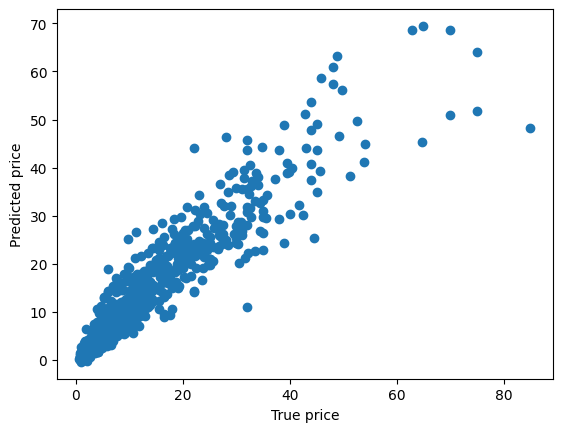

In [460]:
plt.scatter(y_test, y_pred)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()